# What Makes a Tip Higher?
#### Brandon Shellenberger
#### Feburary 9th, 2024

These are the two questions I will be answering about the data set:
1. Do people tip more by percent when the bill is higher?
2. Which day has the highest tipping by average?
3. Who is the overall best tipper?

First part of this project will be setting up the modules and completing a quick insepction of the data.

In [1]:
# Importing Standard Libraries
import numpy as np

# Importing External Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Basic Description of data
df = sns.load_dataset("tips")
print(df.head(10))
print(f"Dimensions: {df.shape}\n")
print(df.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
Dimensions: (244, 7)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


## Numerical Columns

In [3]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


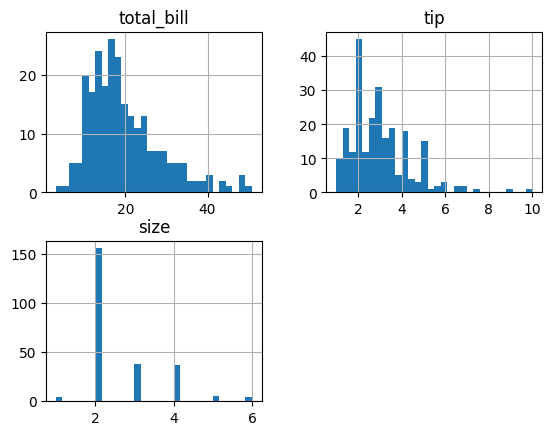

In [4]:
df.hist(bins=30)
plt.show()

#### Numerical Columns Observations
Most of the total bills and tips are on the lower end of the spectrum and slowly tapering off as the values increase. Looking at the size column, there are a lot of 2 member parties with a some 3 and 4 member parties, and a minimal number of 1, 5, and 6 member parties. Now let's us look at the non-numerical columns.

## Categorical Columns
Each of the plots shown below will have 

sex
Male      157
Female     87
Name: count, dtype: int64


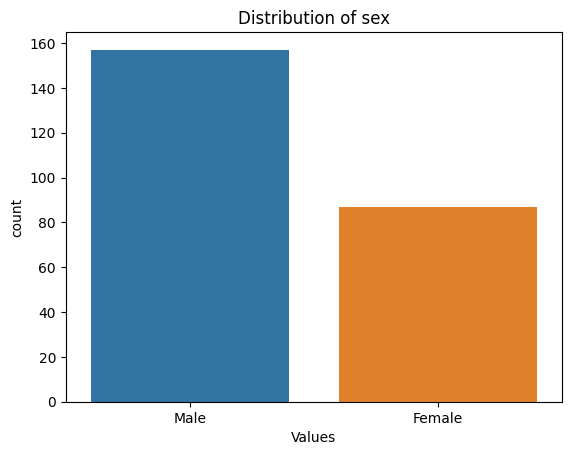

smoker
No     151
Yes     93
Name: count, dtype: int64


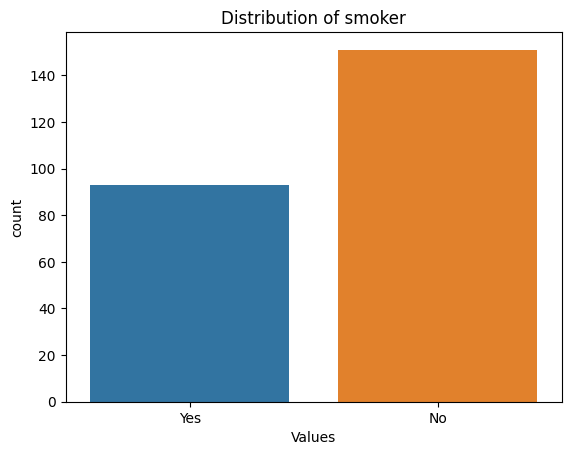

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


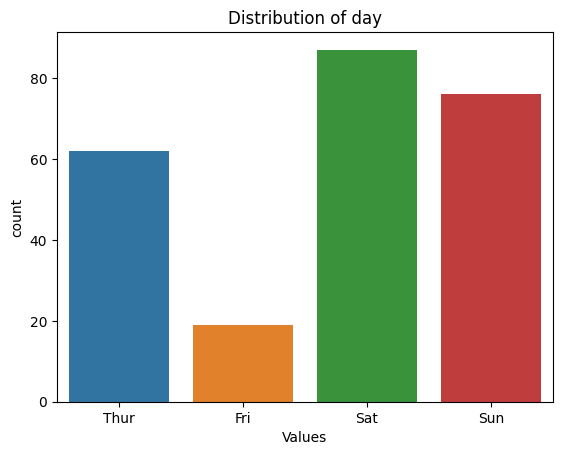

time
Dinner    176
Lunch      68
Name: count, dtype: int64


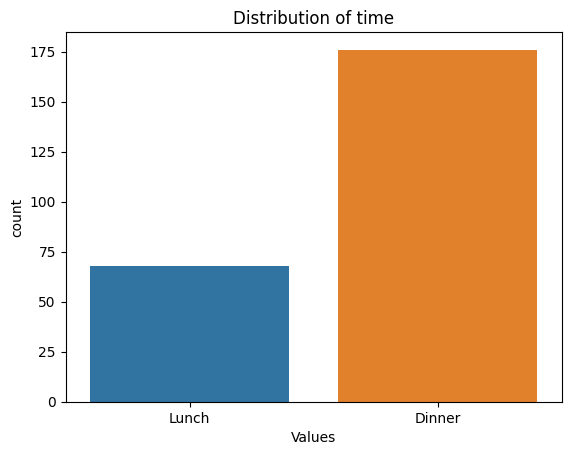

In [5]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(df[col].value_counts())
    # Display count plot
    sns.countplot(x=col, data=df, hue=col)
    plt.xlabel("Values")
    plt.title(f'Distribution of {col}')
    plt.show()

#### Categorical Columns Observations
1. **Mostly males:** In the first plot, there is about 2x more males tipping and than females in the dataset.
2. **Smokers:** The second plot tells another story on whether a person smoked. There are also about 2x more non-smokers than smokers.
3. **Days of the week:** The data is mostly packed with Sunday and Saturday records. But there are not very many Friday observations which might or might not impact the analysis.
4. **Time of Day** There are close to 2.5x more records for Dinner rather than Lunch.

## Renaming Columns and Adding a Column
When writing the tip for a bill, you usually use a percent of the total bill. When the total bill increases, the tip amount will increase even though the percent stays the same. This means that the tip is dependent on the total bill and the tip percent. I added a new column called 'tip_percent' that will reverse the process and find the percent for each total/tip amounts. Each section will have two plots; one with tip amounts and the other with tip percents.

In [6]:
df.rename(columns=
          {'total_bill': 'Total Bill',
           'time': 'Meal'},
          inplace=True)

df['tip_percent'] = round((df['tip']/df['Total Bill']) * 100, 2)
print(df.head(10))

   Total Bill   tip     sex smoker  day    Meal  size  tip_percent
0       16.99  1.01  Female     No  Sun  Dinner     2         5.94
1       10.34  1.66    Male     No  Sun  Dinner     3        16.05
2       21.01  3.50    Male     No  Sun  Dinner     3        16.66
3       23.68  3.31    Male     No  Sun  Dinner     2        13.98
4       24.59  3.61  Female     No  Sun  Dinner     4        14.68
5       25.29  4.71    Male     No  Sun  Dinner     4        18.62
6        8.77  2.00    Male     No  Sun  Dinner     2        22.81
7       26.88  3.12    Male     No  Sun  Dinner     4        11.61
8       15.04  1.96    Male     No  Sun  Dinner     2        13.03
9       14.78  3.23    Male     No  Sun  Dinner     2        21.85


### Outliers
When initially looking at a scatter plot of the tip percent, there are a couple of data points that seem out of range. I am going to use the Inerquartile range to determine if there are any outliers and drop these records.

In [7]:
# Function to remove outliers
def no_outliers(dataframe, column: str):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1

    threshold = 1.5
    # Identifies Outliers
    outliers = dataframe[(dataframe[column] < Q1 - threshold * IQR) | (dataframe[column] > Q3 + threshold * IQR)]
    return outliers

Total_Bill_outliers = no_outliers(df, 'Total Bill')
tip_amount_outliers = no_outliers(df, 'tip')
tip_percent_outliers = no_outliers(df, 'tip_percent')
union_outliers = pd.concat([Total_Bill_outliers, tip_amount_outliers,tip_percent_outliers]).drop_duplicates()
df_copy = df.drop(union_outliers.index)

## 1. Do people tip more when the bill is higher?

I am going to show this relation with a linear model plot through seaborn.

Correlation Coeficient: 0.63


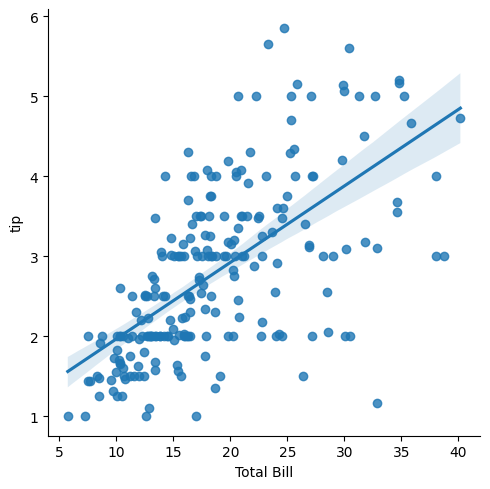

In [8]:
# linear model of total bill and tip amount with correlation coeficient
sns.lmplot(data=df_copy, x='Total Bill', y='tip')
corr_1 = np.corrcoef(x=df_copy['Total Bill'], y=df_copy['tip']).round(2)
print(f'Correlation Coeficient: {corr_1[0,1]}')

After removing the outliers, the linear model shows a trend in the postitive direction but this is not a strong enough correlation to say the two are related. I want to show another linear model, but instead of tip amounts, it shows tip percentages. Again, I am going to remove any outliers using the Interquartile range.

Correlation Coeficient: -0.38


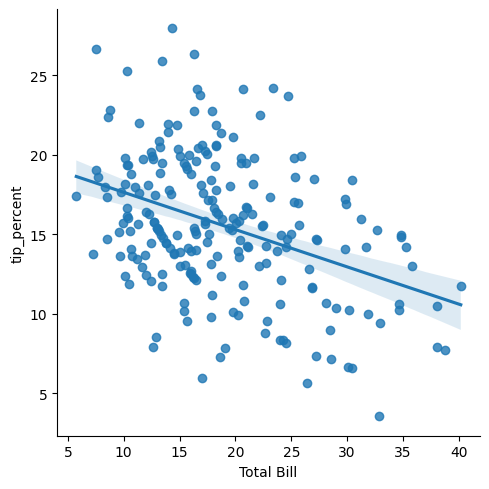

In [9]:
# linear model of total bill and tip percentage with correlation coeficient
sns.lmplot(data=df_copy, x='Total Bill', y='tip_percent')
corr_2 = np.corrcoef(x=df_copy['Total Bill'], y=df_copy['tip_percent']).round(2)
print(f'Correlation Coeficient: {corr_2[0,1]}')

The linear model shows that the correlation between the total bill and the tip percentage has a negative trend, but again are not strongly correlated.

1. Do people tip more when the bill is higher?
    -  Answer:<br>
People do not tip more because their total bill is higher. The tip percentages are usually at an average of about 15.7% as the total bill increases.

## 2. Which day has the highest tipping by average?

In this section, I will use a bar plot to show which day (Thursday - Sunday) has the highest tipping on average. 

C:\Users\holei\AppData\Local\Temp\ipykernel_21740\2507280383.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_average_tipping = df_copy.groupby('day', as_index=False)['tip'].mean().round(2)
C:\Users\holei\AppData\Local\Temp\ipykernel_21740\2507280383.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_copy.groupby('day', as_index=False)['tip'].describe())# prints basic stats for each day by tips


    day  count      mean       std   min   25%   50%     75%   max
0  Thur   59.0  2.629322  1.076946  1.25  2.00  2.18  3.1150  5.85
1   Fri   19.0  2.734737  1.019577  1.00  1.96  3.00  3.3650  4.73
2   Sat   78.0  2.663846  0.986271  1.00  2.00  2.57  3.1575  5.16
3   Sun   69.0  3.104928  1.133932  1.01  2.00  3.06  3.7100  5.65


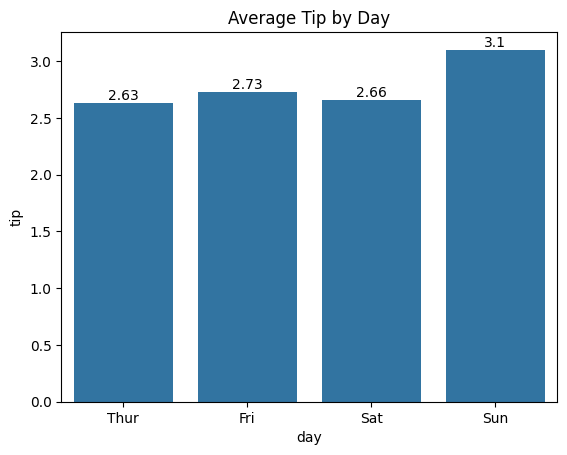

In [10]:
# bar graph of average daily tipping
daily_average_tipping = df_copy.groupby('day', as_index=False)['tip'].mean().round(2)
print(df_copy.groupby('day', as_index=False)['tip'].describe())# prints basic stats for each day by tips
ax_1 = sns.barplot(data=daily_average_tipping, x='day', y='tip')
ax_1.bar_label(ax_1.containers[0], fontsize=10) # Displays values above bars
plt.title('Average Tip by Day')
plt.show()

Looking at the plot, Sunday is the the day to be working as the average tip is $3.10 per table. But I have a feeling this amount is based on the total bill, so the next plot will demonstrate this.

C:\Users\holei\AppData\Local\Temp\ipykernel_21740\4264798874.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_average_tip_percentage = df_copy.groupby('day', as_index=False)['tip_percent'].mean().round(2)
C:\Users\holei\AppData\Local\Temp\ipykernel_21740\4264798874.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_copy.groupby('day', as_index=False)['tip_percent'].describe())# prints basic stats for each day by tips


    day  count       mean       std    min     25%     50%     75%    max
0  Thur   59.0  16.213051  3.856935   7.30  13.980  15.380  19.195  26.63
1   Fri   19.0  16.991579  4.766803  10.36  13.375  15.560  19.665  26.35
2   Sat   78.0  14.743974  4.442825   3.56  12.285  14.985  18.090  27.95
3   Sun   69.0  15.704928  4.540984   5.94  12.340  16.050  18.420  25.27


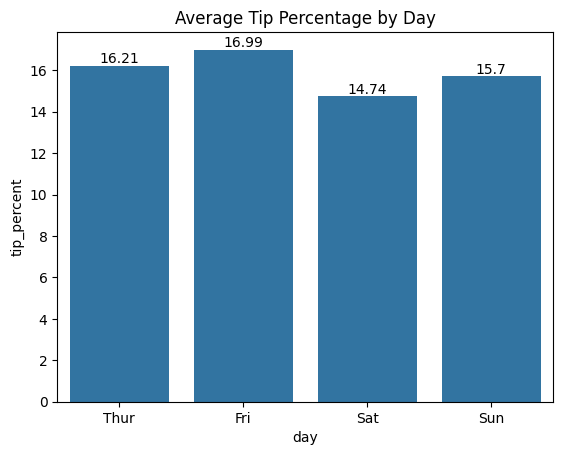

In [11]:
#bar graph of daily average tipping by percentage of total bill
daily_average_tip_percentage = df_copy.groupby('day', as_index=False)['tip_percent'].mean().round(2)
print(df_copy.groupby('day', as_index=False)['tip_percent'].describe())# prints basic stats for each day by tips
ax_2 = sns.barplot(data=daily_average_tip_percentage, x='day', y='tip_percent')
ax_2.bar_label(ax_2.containers[0], fontsize=10) # Displays values above bars
plt.title('Average Tip Percentage by Day')
plt.show()

The plot shows the average tip percentage. Thursdays and Fridays have the highest tip by percentage and Saturdays are the lowest.

2. Which day has the highest tipping by average?
    -  Answer:<br>
The day with the highest tipping average is Sunday. But the tip percent is highest on Fridays.

## 3. Who is the overall best tipper?
This is the last question to answer in the project. To answer this, I am going to use a frequency table and use the sex and smoker columns to decide this. The only parameter that I will be showing.

smoker    Yes     No
sex                 
Male    14.23  15.87
Female  17.38  15.69
Axes(0.125,0.11;0.775x0.77)


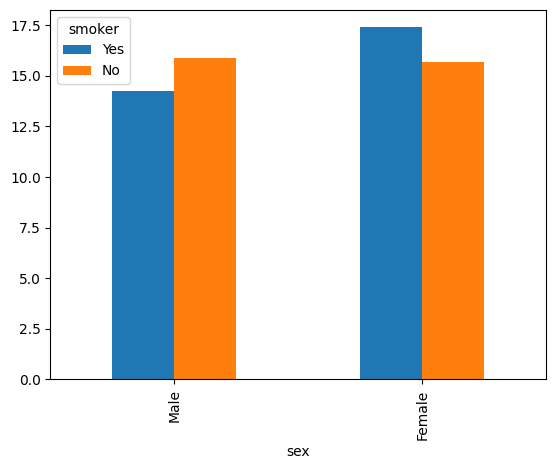

In [12]:
freq_table_1 = pd.crosstab(df_copy['sex'],df_copy['smoker'], values=df['tip_percent'], aggfunc='mean').round(2)
print(freq_table_1)
print(freq_table_1.plot.bar())

3. Who is the overall best tipper?
    -  Answer:<br>
The highest tipper overall is a Female who smokes.

To dive a little deeper, which day has the highest tipper based on this new information.

sex      Male        Female       
smoker    Yes     No    Yes     No
day                               
Thur    16.44  16.65  17.09  15.60
Fri     14.47  13.80  20.91  16.53
Sat     13.68  15.46  15.37  14.80
Sun     13.34  15.90  17.72  16.57
Axes(0.125,0.11;0.775x0.77)


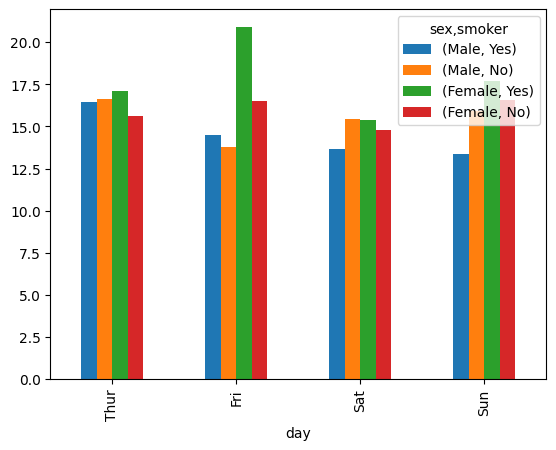

In [13]:
freq_table_2 = pd.crosstab(df_copy['day'],[df_copy['sex'],df_copy['smoker']], values=df['tip_percent'], aggfunc='mean').round(2)
print(freq_table_2)
print(freq_table_2.plot.bar())

## Conlusion
In the end if you want the chance to gain the highest tip of the day, make sure you have checked these three things:
-  Friday
-  Female
-  Smoker